Netflix! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry. Our friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. They believe that the average duration of movies has been declining. Using your friends initial research, you'll delve into the Netflix data to see if you can determine whether movie lengths are actually getting shorter and explain some of the contributing factors, if any.

You have been supplied with the dataset netflix_data.csv , along with the following table detailing the column names and descriptions. This data does contain null values and some outliers, but handling these is out of scope for the project. Feel free to experiment after submitting!

netflix_data.csv |||
columns: ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'duration', 'description', 'genre']

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

netflix_df = pd.read_csv("netflix_data.csv")
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


Subset the DataFrame for "Movies"

In [2]:
netflix_subset = netflix_df[netflix_df["type"] == "Movie"]
netflix_subset

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,95,"After an awful accident, a couple admitted to ...",Horror Movies
...,...,...,...,...,...,...,...,...,...,...,...
7781,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,88,"Dragged from civilian life, a former superhero...",Children
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",Sweden,"October 19, 2020",2005,99,When Lebanon's Civil War deprives Zozo of his ...,Dramas
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,111,A scrappy but poor boy worms his way into a ty...,Dramas
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,44,"In this documentary, South African rapper Nast...",Documentaries


Subset the columns of the new DataFrame

In [3]:
netflix_movies = netflix_subset.loc[:,['title','country','genre','release_year','duration']]
netflix_movies

,title,country,genre,release_year,duration
1,7:19,Mexico,Dramas,2016,93
2,23:59,Singapore,Horror Movies,2011,78
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123
6,122,Egypt,Horror Movies,2019,95
...,...,...,...,...,...
7781,Zoom,United States,Children,2006,88
7782,Zozo,Sweden,Dramas,2005,99
7783,Zubaan,India,Dramas,2015,111
7784,Zulu Man in Japan,NaN,Documentaries,2019,44


Filter the DataFrame by Movie duration less than 60 min.

In [4]:
short_movies = netflix_movies[netflix_movies['duration'] < 60]
short_movies.head(20)

,title,country,genre,release_year,duration
35,#Rucker50,United States,Documentaries,2016,56
55,100 Things to do Before High School,United States,Uncategorized,2014,44
67,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,Uncategorized,2017,37
101,3 Seconds Divorce,Canada,Documentaries,2018,53
146,A 3 Minute Hug,Mexico,Documentaries,2019,28
162,A Christmas Special: Miraculous: Tales of Lady...,France,Uncategorized,2016,22
171,A Family Reunion Christmas,United States,Uncategorized,2019,29
177,A Go! Go! Cory Carson Christmas,United States,Children,2020,22
178,A Go! Go! Cory Carson Halloween,NaN,Children,2020,22
179,A Go! Go! Cory Carson Summer Camp,NaN,Children,2020,21


Assign colors to movie genres. (Initialize an empty list called colors to store your different color values and using a for loop, iterate through netflix_movies rows and append colors to your list based on the genres "Children", "Documentaries", "Stand-Up", and other.)

In [5]:
colors = []

for index, row in netflix_movies.iterrows():
    genre = row['genre'] if 'genre' in row else 'Other'  
    
    if genre == "Children":
        colors.append("blue")
    elif genre == "Documentaries":
        colors.append("green")
    elif genre == "Stand-Up":
        colors.append("red")
    elif genre in ['Dramas', 'Romantic Movies']:
        colors.append("purple")
    elif genre == "Horror Movies":
        colors.append("orange")
    elif genre in ['Action', 'Sports Movies', 'Thrillers']:
        colors.append("black")
    elif genre in ['Comedies', 'Anime Features', 'Cult Movies']:
        colors.append("yellow")
    elif genre in ['Independent Movies', 'International Movies']:
        colors.append("brown")
    elif genre == "Sci-Fi":
        colors.append("cyan")
    elif genre == "Classic Movies":
        colors.append("darkblue")
    elif genre == "Music":
        colors.append("pink")
    elif genre == "LGBTQ Movies":
        colors.append("magenta")
    else:
        colors.append("gray")  


print(colors)


['purple', 'orange', 'black', 'purple', 'orange', 'purple', 'orange', 'orange', 'purple', 'green', 'brown', 'purple', 'purple', 'yellow', 'black', 'purple', 'black', 'purple', 'purple', 'green', 'orange', 'green', 'green', 'purple', 'purple', 'yellow', 'yellow', 'green', 'yellow', 'yellow', 'yellow', 'yellow', 'orange', 'yellow', 'purple', 'black', 'purple', 'purple', 'yellow', 'yellow', 'black', 'green', 'purple', 'gray', 'green', 'purple', 'purple', 'purple', 'orange', 'orange', 'green', 'gray', 'black', 'orange', 'green', 'black', 'yellow', 'purple', 'purple', 'orange', 'orange', 'yellow', 'yellow', 'green', 'brown', 'cyan', 'purple', 'yellow', 'black', 'black', 'black', 'purple', 'black', 'green', 'yellow', 'black', 'purple', 'purple', 'purple', 'yellow', 'green', 'yellow', 'yellow', 'black', 'purple', 'purple', 'purple', 'brown', 'green', 'blue', 'yellow', 'yellow', 'purple', 'black', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'purple', 'yellow', 'purple', 'black', 'black',

Plot the movie duration by year using the genre colors created. (Using netflix_movies, initialize a figure object called fig with width 12 and height 8 to create a scatter plot with release_year on the x-axis labelled "Release year", the movie duration on the y-axis labelled "Duration (min)", the title "Movie Duration by Year of Release", and coloring the points with the new colors list.)

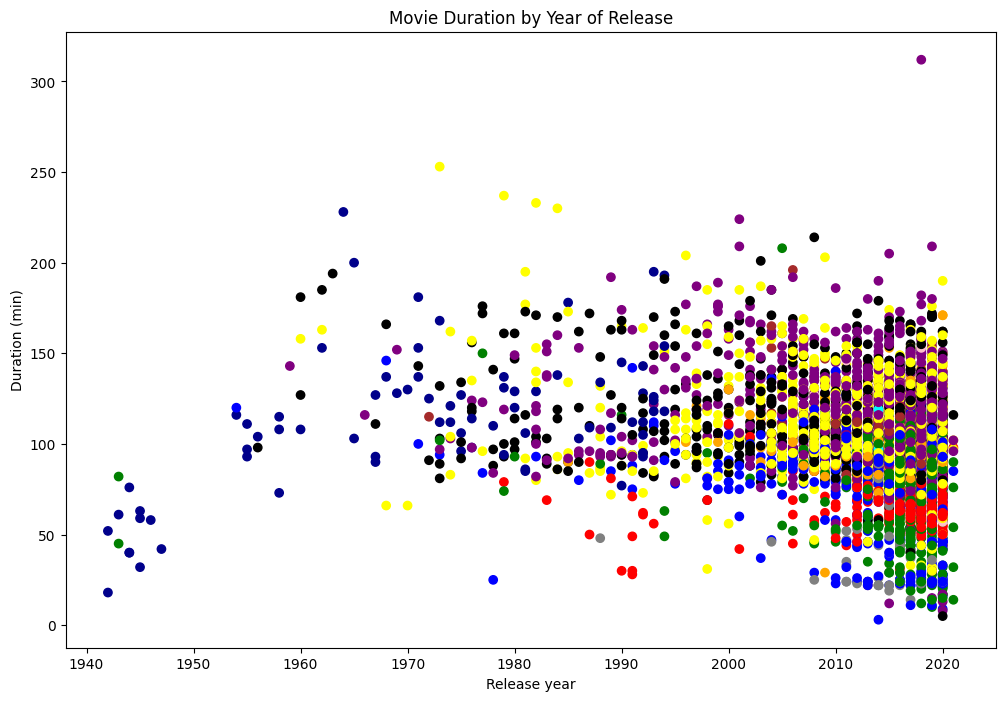

In [6]:
fig = plt.figure(figsize=(12, 8))
plt.scatter(netflix_movies['release_year'], netflix_movies['duration'], color=colors)
plt.title('Movie Duration by Year of Release')
plt.xlabel("Release year")  
plt.ylabel("Duration (min)")
plt.show()

Answer "Are we certain that movies are getting shorter?"
(Provide your answer to the question "Are we certain that movies are getting shorter?" in the form of a string and assign it to the variable answer; the possible answers are "yes", "no", or "maybe".)

In [7]:
answer = "no"